In [1]:
from src.n_forest import *
%matplotlib widget

In [2]:
rho = 4.2     # fertility
f = 1         # aging_rate
a_1 = 1       # biotic_pump_young
a_2 = 0       # biotic_pump_old
h = 2         # mortality_old
dist = 50
beta_2 = 1
P_0 = 1.05
w_0 = 1
alpha_0 = -1.0
beta_1 = 0

arguments = (rho,f,a_1,h,a_2,dist,beta_2,P_0,w_0,alpha_0,beta_1)

Phase space diagram for 2-forest system

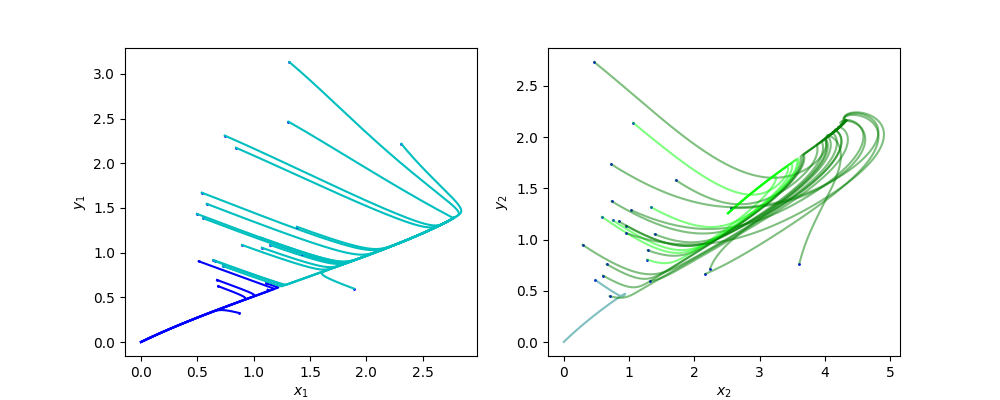

In [3]:
N = 25
np.random.seed(16)
init_x, init_y = [np.random.lognormal(0.0, 0.5, 2) for _ in range(N)], [np.random.lognormal(0.0, 0.5, 2) for _ in range(N)]

# init_x, init_y = [[2.63245325,np.random.uniform(0, 5)] for _ in range(N)], [[1.316, np.random.uniform(0, 5)] for _ in range(N)]

fig, [ax1, ax2] = plt.subplots(1,2,figsize=(10,4))
for n in range(N):
    ax1.plot(init_x[n][0], init_y[n][0], 'bo', ms=1)
    ax2.plot(init_x[n][1], init_y[n][1], 'bo', ms=1)
    xs, ys = system_n_forests(init_x[n], init_y[n], arguments, timesteps=800, dt = 0.01)

    if xs[0][-1] < 1:
        color1 = 'b'
    else:
        color1 = 'c'

    if xs[1][-1] < 1:
        color2 = 'teal'
    elif 1 < xs[1][-1] < 3 :
        color2 = 'lime'
    else:
        color2 = 'g'

    ax1.plot(xs[0], ys[0], color1)
    ax2.plot(xs[1], ys[1], color2, ms=1, alpha=0.5)

ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$y_1$')
ax2.set_xlabel(r'$x_2$')
ax2.set_ylabel(r'$y_2$')
plt.show()

Grid values to equilibrium (not very relevant but still here for completeness)

In [ ]:
x_eq = [2.63245325, 1.316]
steps = 50
grid_x, grid_y = np.meshgrid(np.linspace(0, 5, steps), np.linspace(0, 5, steps))
phase_grid = np.zeros((steps, steps))

fig, ax = plt.subplots()

for x in range(steps):
    for y in range(steps):
        # xs, ys = system_n_forests(np.random.uniform(0, 5, 2), [grid_x[x][y], grid_y[x][y]], arguments, timesteps=2000, dt = 0.01, dist=150)
        xs, ys = system_n_forests([1.5,1.0], [grid_x[x][y], grid_y[x][y]], arguments, timesteps=100, dt = 0.01, dist=150)

        ax.plot(xs[1][-1], ys[1][-1], 'bo')
        # ax.plot(grid_x[x][y], grid_y[x][y], 'o')
        
        if xs[1][-1] < 1:
            value = 0
        elif 1<xs[1][-1] <3:
            value = 1
        else:
            value = 2
        phase_grid[x][y] = value

plt.show()

In [ ]:
fig, ax = plt.subplots()
grid = ax.imshow(phase_grid, origin='lower', cmap='coolwarm_r')
fig.colorbar(grid)
plt.show()